In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

%matplotlib inline

# import data
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')

# set target data
churn_target = churn_data.iloc[:,-1]

# set feature data
churn_data.drop(["customerID","Churn"], axis=1, inplace=True)

# set training and test variables
X = np.array(churn_data)
y = np.array(churn_target)

# set variables for target and features
features = list(churn_data)
targets = list(churn_target)

# divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# set seaborn style and fontsize
sb.set_style('ticks')
sb.set_context('paper', font_scale=1.6)

In [2]:
import time

#define the model
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3)

# fit the model and time it
start = time.time()

clf_gini.fit(X_train, y_train)

stop = time.time()

print(f"Training: {stop - start} seconds")

# get predicted values
y_pred = clf_gini.predict(X_test)

# get accuracy
print (f"Accuracy : {accuracy_score(y_test,y_pred)*100 }%")
      

Training: 0.005998849868774414 seconds
Accuracy : 78.70722433460075%


<AxesSubplot:>

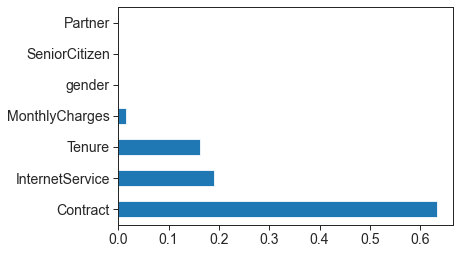

In [3]:
# get feature importance
importance = clf_gini.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feat_importances = pd.Series(importance, index=churn_data.columns)
feat_importances.nlargest(7).plot(kind='barh')

<AxesSubplot:>

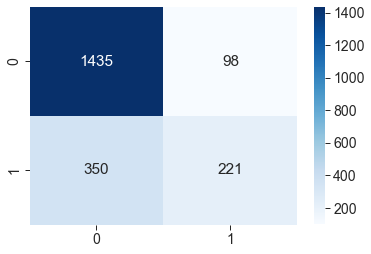

In [12]:
# plot confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='Blues', fmt='g')

<AxesSubplot:>

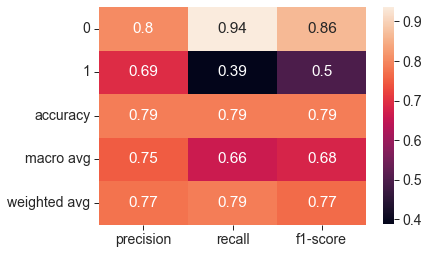

In [10]:
# plot classification report
clf_report = classification_report(y_test, 
                                   y_pred,
                                   output_dict=True)
sb.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

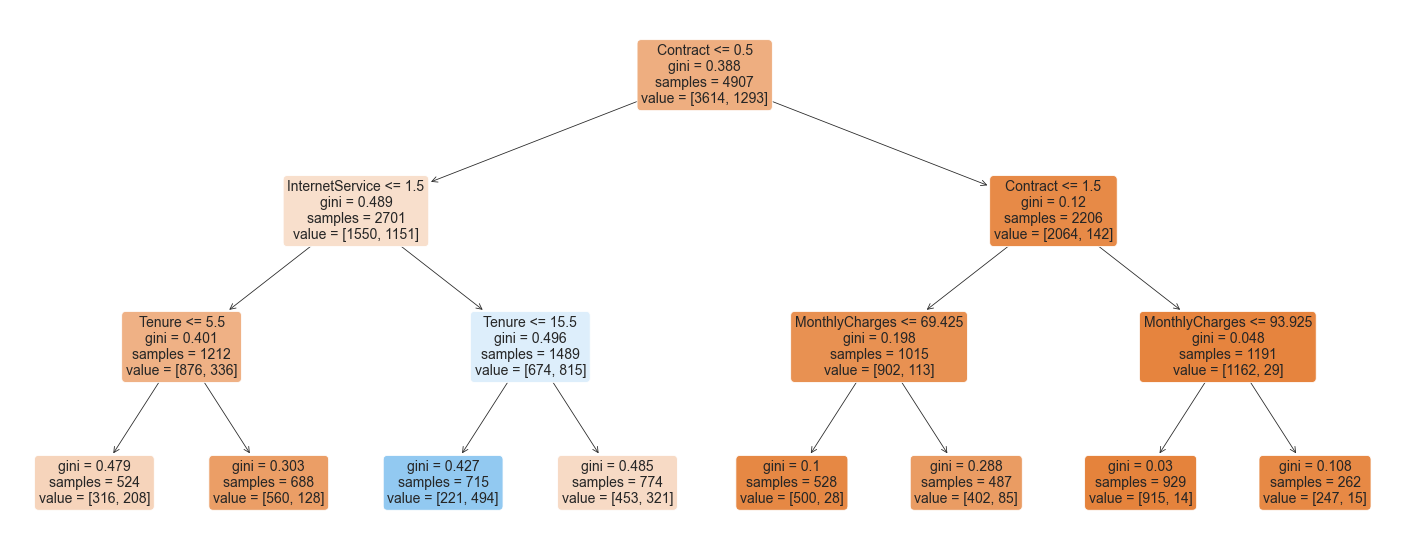

In [6]:
# plot decision tree
plt.figure(figsize=(25,10))
a = plot_tree(clf_gini, 
              feature_names=features, 
              filled=True, 
              rounded=True, 
              fontsize=14)

Training: 0.005998373031616211 seconds
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1435   98]
 [ 350  221]]
Accuracy :  78.70722433460075
Report :                precision    recall  f1-score   support

           0       0.80      0.94      0.86      1533
           1       0.69      0.39      0.50       571

    accuracy                           0.79      2104
   macro avg       0.75      0.66      0.68      2104
weighted avg       0.77      0.79      0.77      2104



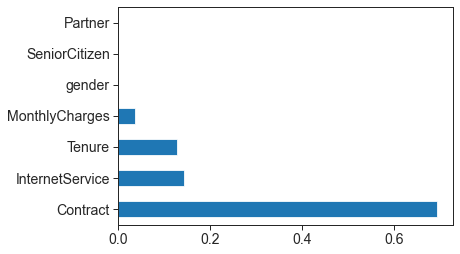

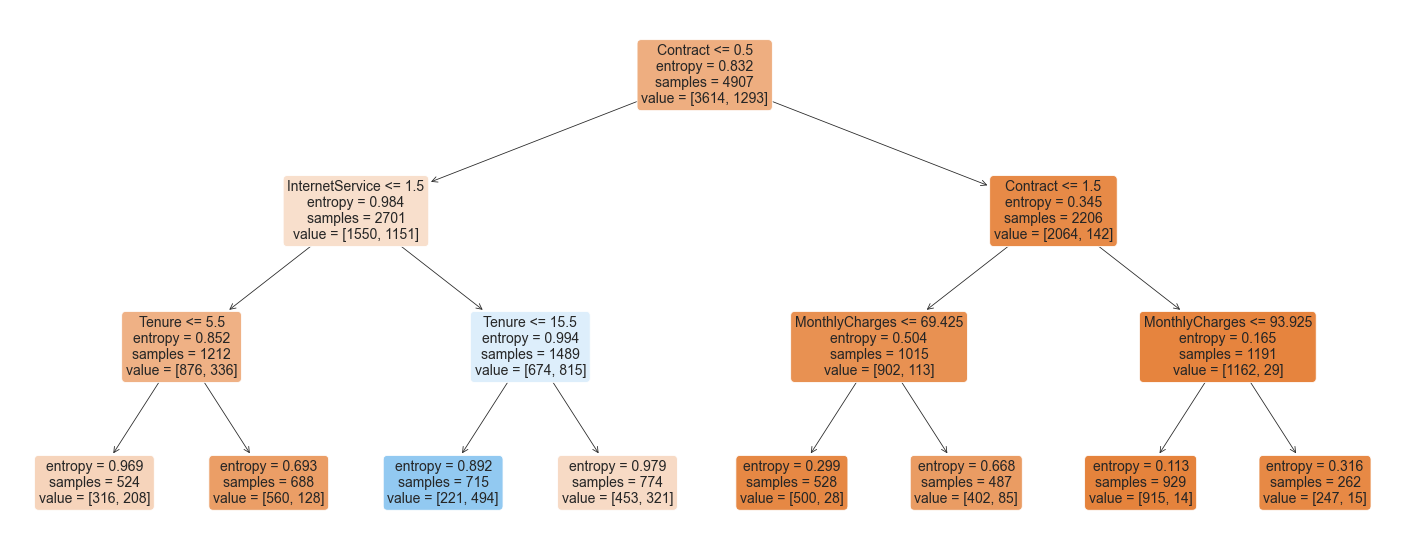

In [7]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# fit the model and time it
start = time.time()

clf_entropy.fit(X_train, y_train)

stop = time.time()

print(f"Training: {stop - start} seconds")

# get feature importance
importance = clf_entropy.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feat_importances = pd.Series(importance, index=churn_data.columns)
feat_importances.nlargest(7).plot(kind='barh')

y_pred = clf_entropy.predict(X_test)

print("Predicted values:")
print(y_pred)

print("Confusion Matrix: ", 
      confusion_matrix(y_test, y_pred))

print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
    classification_report(y_test, y_pred))

plt.figure(figsize=(25,10))
a = plot_tree(clf_entropy, 
              feature_names=features, 
              filled=True, 
              rounded=True, 
              fontsize=14)